In [1]:
import requests
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import scipy.stats as stats
#from statsmodels.stats.proportion import proportion_confint
#from nssstats.plots import qq_plot

In [2]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=1900-01-01&endtime=2020-10-22&minlatitude=34.9884&maxlatitude=36.6871&minlongitude=-90.3131&maxlongitude=-81.6518'

In [3]:
u = requests.get(url)

In [4]:
print(u.text[:1000])

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2020-10-21T21:49:45.720Z,36.0705,-89.8023333,6.84,2.14,md,46,40,0.0643,0.1,nm,nm60312762,2020-10-22T12:49:53.160Z,"2 km NNE of Cooter, Missouri",earthquake,0.17,0.49,0.092,31,reviewed,nm,nm
2020-10-21T20:28:42.930Z,36.525,-89.5691667,6.85,1.69,md,19,50,0.02596,0.03,nm,nm60312752,2020-10-22T14:45:56.660Z,"3 km E of Marston, Missouri",earthquake,0.34,0.63,0.167,12,reviewed,nm,nm
2020-10-21T04:55:51.350Z,36.5456667,-89.649,8.01,1.61,md,24,44,0.02245,0.04,nm,nm60312697,2020-10-21T13:04:57.100Z,"4 km NW of Marston, Missouri",earthquake,0.44,0.4,0.147,21,reviewed,nm,nm
2020-10-21T03:00:08.800Z,36.3136667,-89.5361667,9.5,1.23,md,17,65,0.02693,0.06,nm,nm60312692,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10,reviewed,nm,nm
2020-10-20T18:50:21.800Z,36.2675,-89.5233333,8.84,2.33,md,46,33,0.0152,0.11

In [5]:
type(u)

requests.models.Response

In [6]:
u.status_code

200

In [7]:
usgs = pd.read_csv(StringIO(u.text))

In [8]:
#usgs = pd.read_csv(r.url, header=None, sep='\n')
#usgs = usgs[0].str.split(',', expand=True)
usgs = pd.read_csv(u.url)
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-10-21T21:49:45.720Z,36.070500,-89.802333,6.84,2.14,md,46.0,40.0,0.06430,0.10,...,2020-10-22T12:49:53.160Z,"2 km NNE of Cooter, Missouri",earthquake,0.17,0.49,0.092,31.0,reviewed,nm,nm
1,2020-10-21T20:28:42.930Z,36.525000,-89.569167,6.85,1.69,md,19.0,50.0,0.02596,0.03,...,2020-10-22T14:45:56.660Z,"3 km E of Marston, Missouri",earthquake,0.34,0.63,0.167,12.0,reviewed,nm,nm
2,2020-10-21T04:55:51.350Z,36.545667,-89.649000,8.01,1.61,md,24.0,44.0,0.02245,0.04,...,2020-10-21T13:04:57.100Z,"4 km NW of Marston, Missouri",earthquake,0.44,0.40,0.147,21.0,reviewed,nm,nm
3,2020-10-21T03:00:08.800Z,36.313667,-89.536167,9.50,1.23,md,17.0,65.0,0.02693,0.06,...,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10.0,reviewed,nm,nm
4,2020-10-20T18:50:21.800Z,36.267500,-89.523333,8.84,2.33,md,46.0,33.0,0.01520,0.11,...,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,34.0,reviewed,nm,nm


In [9]:
usgs.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9158,1916-02-21T23:39:00.000Z,35.5,-82.5,NaN,5.2,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,North Carolina,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
9159,1915-12-07T18:40:00.000Z,36.0,-90.0,NaN,4.5,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Arkansas,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar
9160,1913-03-28T21:50:00.000Z,36.2,-83.7,NaN,4.1,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
9161,1903-11-04T19:14:00.000Z,36.5,-89.8,NaN,5.1,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Missouri,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
9162,1903-11-04T18:18:00.000Z,36.5,-89.5,NaN,4.6,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc


In [10]:
usgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9163 entries, 0 to 9162
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9163 non-null   object 
 1   latitude         9163 non-null   float64
 2   longitude        9163 non-null   float64
 3   depth            9150 non-null   float64
 4   mag              9160 non-null   float64
 5   magType          9152 non-null   object 
 6   nst              6155 non-null   float64
 7   gap              6153 non-null   float64
 8   dmin             5979 non-null   float64
 9   rms              6164 non-null   float64
 10  net              9163 non-null   object 
 11  id               9163 non-null   object 
 12  updated          9163 non-null   object 
 13  place            9163 non-null   object 
 14  type             9163 non-null   object 
 15  horizontalError  6214 non-null   float64
 16  depthError       6213 non-null   float64
 17  magError      

In [11]:
# Find all of the earthquakes specific to Tennessee
usgs[usgs['place'].str.contains('(Tennessee)')]
usgs_tn = usgs[usgs['place'].str.contains('(Tennessee)')]
usgs_tn

C:\Users\daily\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3,2020-10-21T03:00:08.800Z,36.313667,-89.536167,9.50,1.23,md,17.0,65.0,0.02693,0.06,...,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10.0,reviewed,nm,nm
4,2020-10-20T18:50:21.800Z,36.267500,-89.523333,8.84,2.33,md,46.0,33.0,0.01520,0.11,...,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,34.0,reviewed,nm,nm
7,2020-10-19T20:19:38.490Z,36.224000,-82.817167,17.27,2.31,md,8.0,70.0,0.17510,0.12,...,2020-10-23T06:52:55.336Z,"6 km N of Greeneville, Tennessee",earthquake,0.91,1.69,0.099,6.0,reviewed,se,se
8,2020-10-19T05:15:25.090Z,36.209500,-89.476167,6.33,1.59,md,16.0,59.0,0.04374,0.05,...,2020-10-19T13:03:45.780Z,"6 km S of Ridgely, Tennessee",earthquake,0.26,0.56,0.086,14.0,reviewed,nm,nm
10,2020-10-17T07:12:44.060Z,35.366833,-85.213500,17.99,2.26,md,16.0,59.0,0.15870,0.14,...,2020-10-17T13:54:48.250Z,"4 km NNW of Flat Top Mountain, Tennessee",earthquake,0.33,0.60,0.152,15.0,reviewed,se,se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,1952-07-16T23:48:10.000Z,36.200000,-89.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis
9153,1928-11-03T04:02:50.200Z,36.112000,-82.828000,5.00,4.50,lg,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,dg
9156,1918-10-16T02:15:00.000Z,36.000000,-89.200000,NaN,4.50,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sg
9160,1913-03-28T21:50:00.000Z,36.200000,-83.700000,NaN,4.10,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc


In [12]:
usgs_tn.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,4755.000000,4755.000000,4749.000000,4753.000000,3520.000000,3518.000000,3429.000000,3528.000000,3560.000000,3559.000000,3506.000000,3519.000000
mean,36.148204,-88.385203,8.602746,1.653404,14.655114,93.231950,0.064863,0.075771,0.935037,1.894777,0.146278,6.823245
std,0.318916,2.132069,4.556980,0.519565,8.687582,46.951008,0.068305,0.072726,2.490046,3.271671,0.141483,6.272703
min,34.994667,-90.073167,0.000000,0.000000,0.000000,21.000000,0.001070,0.000000,0.110000,0.100000,0.001000,0.000000
25%,36.135667,-89.518417,5.700000,1.300000,9.000000,59.000000,0.027340,0.040000,0.370000,0.650000,0.056000,3.000000
50%,36.260000,-89.469000,7.670000,1.600000,12.000000,82.000000,0.041180,0.060000,0.600000,1.100000,0.104000,5.000000
75%,36.320500,-89.384000,9.850000,1.900000,19.000000,112.750000,0.067380,0.090000,1.100000,2.200000,0.169000,8.000000
max,36.638000,-81.717667,37.300000,4.700000,89.000000,343.000000,0.695000,1.000000,99.000000,99.000000,0.950000,70.000000


4,755 earthquakes since 1900 in Tennessee (when filtered to the long/lat & occurences of 'Tennessee' in 'place' column).  Average magnitude 1.65 with highest being 4.7.  

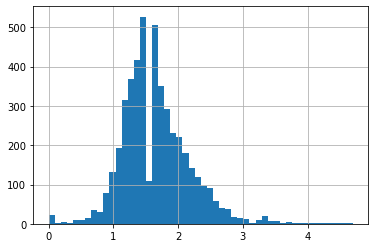

In [14]:
#look at histogram of magnitude
usgs_tn['mag'].hist(bins = 50);

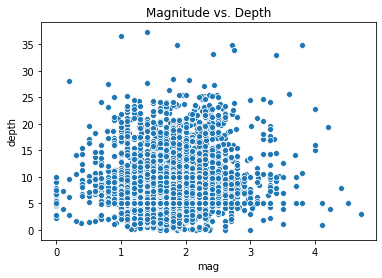

In [15]:
sns.scatterplot(data = usgs_tn, x = 'mag', y = 'depth')
plt.title('Magnitude vs. Depth');
plt.show()

There does not appear to be any correlation between magnitude & depth.  

In [17]:
usgs_tn[['time', 'mag', 'depth', 'place']].corr()

,mag,depth
mag,1.000000,0.153033
depth,0.153033,1.000000


In [21]:
usgs_tn.sort_values('depth', ascending = True).head(15)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1887,2016-06-22T16:20:17.250Z,36.474500,-82.571333,0.00,1.87,md,9.0,148.0,0.20070,0.13,...,2016-06-23T15:10:50.600Z,"6km W of Colonial Heights, Tennessee",quarry blast,0.46,0.79,0.117,6.0,reviewed,se,se
5630,2001-04-13T16:36:20.790Z,36.530000,-83.340000,0.00,3.00,md,16.0,NaN,NaN,NaN,...,2014-11-07T01:12:34.545Z,eastern Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,tva,tva
3120,2012-08-10T04:51:49.770Z,36.369000,-83.546667,0.00,1.60,md,15.0,85.0,0.07079,0.22,...,2016-04-07T20:00:04.710Z,"9km SSE of New Tazewell, Tennessee",earthquake,1.40,7.70,0.061,2.0,reviewed,se,se
5552,2001-07-08T03:05:11.100Z,35.880000,-86.800000,0.00,2.60,md,10.0,NaN,NaN,NaN,...,2014-11-07T01:13:15.794Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,tva,tva
8854,1976-01-03T16:10:46.300Z,36.440000,-89.520000,0.00,1.70,mlg,NaN,NaN,NaN,NaN,...,2016-04-14T13:03:18.730Z,"8km NNW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
750,2019-03-15T07:53:07.010Z,35.676333,-84.229500,0.02,2.16,md,8.0,102.0,0.02656,0.43,...,2019-03-15T13:30:57.450Z,"5km WNW of Greenback, Tennessee",earthquake,1.21,10.87,0.058,5.0,reviewed,se,se
1094,2018-08-03T16:57:13.650Z,35.741333,-83.989167,0.04,2.36,md,13.0,134.0,0.18200,0.25,...,2018-12-12T09:35:04.526Z,"2km SW of Maryville, Tennessee",earthquake,0.83,4.86,0.056,10.0,reviewed,se,se
1557,2017-04-20T23:17:22.790Z,36.238167,-89.429167,0.08,1.15,md,5.0,184.0,0.01065,0.05,...,2017-04-24T14:15:11.100Z,"5km ESE of Ridgely, Tennessee",earthquake,0.67,0.12,0.073,4.0,reviewed,nm,nm
771,2019-02-28T15:27:35.560Z,35.700667,-84.239833,0.10,2.31,md,13.0,108.0,0.04386,0.32,...,2019-02-28T19:01:50.207Z,"7km NW of Greenback, Tennessee",earthquake,0.85,4.93,0.048,7.0,reviewed,se,se
7523,1983-10-15T05:04:49.750Z,36.467000,-89.552000,0.10,2.10,md,NaN,NaN,NaN,NaN,...,2016-04-14T15:55:52.110Z,"12km NW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm


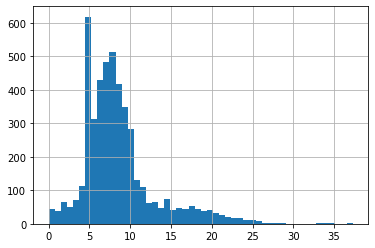

In [19]:
#look at histogram of depth
usgs_tn['depth'].hist(bins = 50);

Next:  suggest a geospatial view of the locations and any correlation between mag and/or depth.  Also a histogram of events over time

In [ ]:
# this code only returns places where exact name is only 'Tennessee' so falls short
#usgs[usgs['place'].isin(['Tennessee'])]

In [ ]:
# Confidence interval for depth
# proportion_confint( count = usgs_tn['depth'].value_counts().loc[True],
#                    nobs = usgs_tn['depth'].count(),
#                    alpha = 0.05
#                   )

In [ ]:
# this and any variation of findall gets error message.  Also tried loc 
#re.findall('Tennessee', usgs[usgs['place']])
#usgs['place'].findall(r'Tennessee')

In [ ]:
#usgs = pd.read_csv(r.url, header=None, sep='\n')
#usgs = usgs[0].str.split(',', expand=True)
#usgs.head()
